In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
# Création du dataset
def creer_datasets():
    # Classe 0 (points dans [0,10] x [0,10])
    classe_0 = np.array([[random.uniform(0, 10), random.uniform(0, 10), 0] for _ in range(100)])
    
    # Classe 1 (points dans [-10, 0] x [0,10])
    classe_1 = np.array([[random.uniform(-10, 0), random.uniform(0, 10), 1] for _ in range(100)])
    
    # Combiner et mélanger les deux classes
    dataset = np.concatenate((classe_0, classe_1), axis=0)
    np.random.shuffle(dataset)
    
    # Diviser en dataset d'entraînement (80%) et de test (20%)
    split_index = int(0.8 * len(dataset))
    dataset_entrainement = dataset[:split_index]
    dataset_test = dataset[split_index:]
    
    return dataset_entrainement, dataset_test

In [21]:
# Entraînement du neurone
def entrainer_neurone(dataset, learning_rate=0.01, epochs=1000):
    # Initialisation des poids (w1, w2) et du biais (b)
    w = np.random.rand(2)
    b = np.random.rand()
    
    for epoch in range(epochs):
        for point in dataset:
            x = point[:2]  # Coordonnées (x1, x2)
            y = point[2]   # Classe (0 ou 1)
            
            # Calcul de la sortie prédite (y_hat)
            y_hat = 1 / (1 + np.exp(-np.dot(w, x) - b))  # Sigmoïde
            
            # Calcul de l'erreur et ajustement des paramètres
            erreur = y - y_hat
            w += learning_rate * erreur * x
            b += learning_rate * erreur
    
    return w, b

In [22]:
# Mesure de la précision
def mesurer_precision(dataset, w, b):
    bien_classes = 0
    for point in dataset:
        x = point[:2]
        y = point[2]
        
        # Prédiction
        y_hat = 1 / (1 + np.exp(-np.dot(w, x) - b))
        prediction = 1 if y_hat >= 0.5 else 0
        
        if prediction == y:
            bien_classes += 1
    
    precision = bien_classes / len(dataset)
    return precision

In [23]:
# Visualisation des données et du modèle
def tracer_resultats(dataset, w, b):
    plt.figure(figsize=(8, 6))
    for point in dataset:
        if point[2] == 0:
            plt.scatter(point[0], point[1], color='blue', label="Classe 0" if "Classe 0" not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(point[0], point[1], color='red', label="Classe 1" if "Classe 1" not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Tracer la frontière de décision
    x_vals = np.linspace(-10, 10, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, color='green', label="Frontière de décision")
    
    plt.title("Classification par un perceptron")
    plt.xlabel("Axe X")
    plt.ylabel("Axe Y")
    plt.ylim(0, 10)  # Limite des ordonnées de 0 à 10
    plt.legend()
    plt.show()

Précision sur le dataset de test : 100.00%


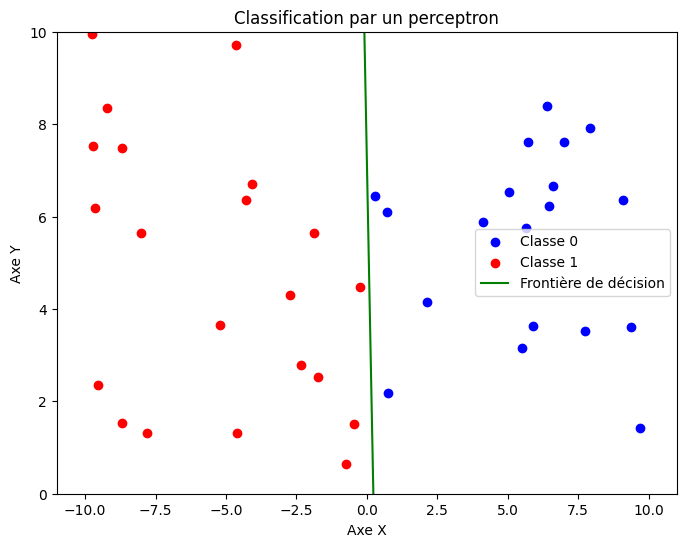

In [24]:
# Affichage principal
dataset_entrainement, dataset_test = creer_datasets()
w, b = entrainer_neurone(dataset_entrainement)
precision = mesurer_precision(dataset_test, w, b)

print(f"Précision sur le dataset de test : {precision * 100:.2f}%")
tracer_resultats(dataset_test, w, b)